<a href="https://colab.research.google.com/github/YuxingW/deep_learning/blob/main/hw3/part_c2_tensorflow_auto_differentiation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Tensorflow tensor datastructure with auto differentiation

In [14]:
%matplotlib inline
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import optimizers
import tensorflow as tf

#### 3d-2d non-linear data generation

In [15]:
n = 200
d = 3
x = np.random.uniform(-1, 1, (n, d))

weights_true = np.array([[3, 1, -1],[2, 0, -2],]).T
bias_true = np.array([0.5, 0.1])

y_true = (x ** 2) @ weights_true + x @ weights_true + bias_true

#Convert to tensor
x = tf.convert_to_tensor(x, dtype=tf.float32)
y = tf.convert_to_tensor(y_true, dtype=tf.float32)

print(f'x: {x.shape}, weights: {weights_true.shape}, bias: {bias_true.shape}, y: {y.shape}')

x: (200, 3), weights: (3, 2), bias: (2,), y: (200, 2)


#### Define model and loss

In [16]:
def compute_predictions(x, weights, bias):
    return tf.matmul(tf.pow(x,2), weights) + tf.matmul(x, weights) + bias

In [17]:
def compute_loss(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))

####Initialize weights and bias for model

In [18]:
input_dim = 3
output_dim = 2

# This is our weight matrix
w = tf.Variable(tf.random.uniform(shape=(input_dim, output_dim)))
# This is our bias vector
b = tf.Variable(tf.zeros(shape=(output_dim,)))

####Initialize learning rate and optimizer

In [19]:
learning_rate = 1e-3
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-3)

####Do training loop with eporches

Computing gradients with GrandientTape

In [20]:
def train_on_batch(x, y, w, b):
  with tf.GradientTape() as tape:
    predictions = compute_predictions(x, w, b)
    loss = compute_loss(y, predictions)
    # tape.gradient works with a list as well (w, b).
    dloss_dw, dloss_db = tape.gradient(loss, [w, b])
  w.assign_sub(learning_rate * dloss_dw)
  b.assign_sub(learning_rate * dloss_db)
  return predictions, loss

In [21]:
# Shuffle the data.
# Create a tf.data.Dataset object for easy batched iteration
dataset = tf.data.Dataset.from_tensor_slices((x, y))
dataset = dataset.shuffle(buffer_size=1024).batch(256)

for epoch in range(5000):
  for step, (x, y) in enumerate(dataset):
    y_pred, loss = train_on_batch(x, y, w, b)
  if epoch % 500 ==0:
    print('Epoch %d: last batch loss = %.4f' % (epoch, float(loss)))

Epoch 0: last batch loss = 4.4119
Epoch 500: last batch loss = 2.4448
Epoch 1000: last batch loss = 1.4888
Epoch 1500: last batch loss = 0.9384
Epoch 2000: last batch loss = 0.5985
Epoch 2500: last batch loss = 0.3835
Epoch 3000: last batch loss = 0.2463
Epoch 3500: last batch loss = 0.1585
Epoch 4000: last batch loss = 0.1021
Epoch 4500: last batch loss = 0.0659


####Plot the output and the real data using tsne

In [30]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

def plot_comparison(y_true, y_pred):
  #tsne = TSNE(n_components=2, perplexity=50, learning_rate=100, random_state=120)
  tsne = TSNE(n_components=2, random_state=0)
  yt_2d = tsne.fit_transform(y_true)
  yp_2d = tsne.fit_transform(y_pred)

  plt.figure(figsize=(6, 5))
  plt.scatter(yt_2d[:, 0], yt_2d[:, 1], c='b', label='y_true')
  plt.scatter(yp_2d[:, 0], yp_2d[:, 1], c='y', label='y_pred')
  plt.legend()
  plt.title('TSNE Y_True Y_Pred Comparison')
  plt.xlabel('t_SNE1')
  plt.xlabel('t_SNE2')
  plt.show()

def plot_distribution(x, y_true, y_pred):
  tsne = TSNE(n_components=1, random_state=0)
  x_2d = tsne.fit_transform(x)
  yt_2d = tsne.fit_transform(y_true)
  yp_2d = tsne.fit_transform(y_pred)

  plt.figure(figsize=(6, 5))
  plt.scatter(x_2d[:, 0], yt_2d[:, 0], c='b', label='y_true')
  plt.scatter(x_2d[:, 0], yp_2d[:, 0], c='y', label='y_pred')
  plt.legend()
  plt.title('TSNE Y_True Y_Pred Distribution with X')
  plt.show()

def plot_3d(x, y, y_pred=None):
  import matplotlib.pyplot as plt
  from mpl_toolkits.mplot3d import Axes3D
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  ax.scatter(x[:, 0], x[:, 1], y, label='y_true')
  if y_pred is not None:
    ax.scatter(x[:, 0], x[:, 1], y_pred, label='y_pred')
  plt.legend()

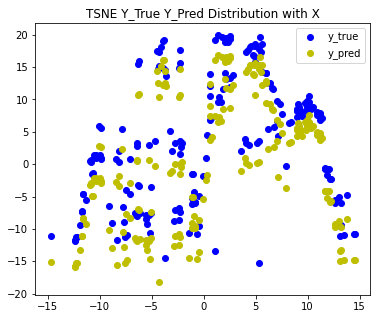

In [23]:
plot_distribution(x, y, y_pred)

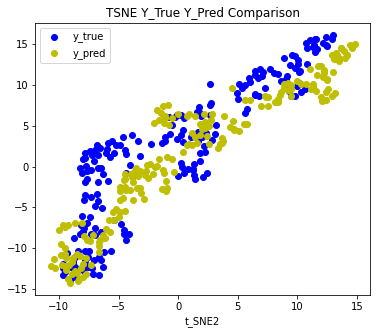

In [24]:
plot_comparison(y, y_pred)

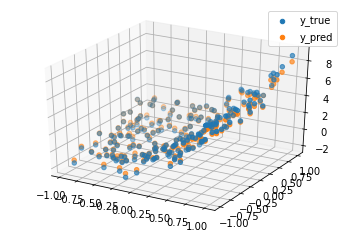

In [31]:
plot_3d(x, y[:, 0], y_pred=y_pred[:, 0])

In [26]:
y_pred.shape

TensorShape([200, 2])

Because there is auto differentiation and back propagation, the y_pred is converging to y_true.